# Code pour l'ordinateur récepteur

## I. Initialisation des données

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numpy import genfromtxt
import sounddevice as sd
import soundfile as sf

## II. Démodulation ASK 

In [9]:
# Fichier de la modulation
filename = 'modulation_ASK.wav'

# Lecture de la modulation avec la fonction read de la bibliothèqye soundfile
# Cette fonction renvoie data : données du fichier .wav et Fe : fréquence d'échantillonnage utilisée en enregistrement.
data, Fe = sf.read(filename)

# Afficher quelques informations du fichier audio
print('-------------------Informations utiles sur le fichier audio---------')
print('1. La modulation est une matrice de taille :', data.shape)
print('2. la fréquence d échantillonnage de la modulation est :', Fe, 'Hz') 
print('3. Le nombre d échantillons de la modulation est :', len(data))
print('------------------------------Fin------------------------------------')

-------------------Informations utiles sur le fichier audio---------
1. La modulation est une matrice de taille : (493920,)
2. la fréquence d échantillonnage de la modulation est : 44100 Hz
3. Le nombre d échantillons de la modulation est : 493920
------------------------------Fin------------------------------------


La modulation a une durée de : 11.2 secondes.


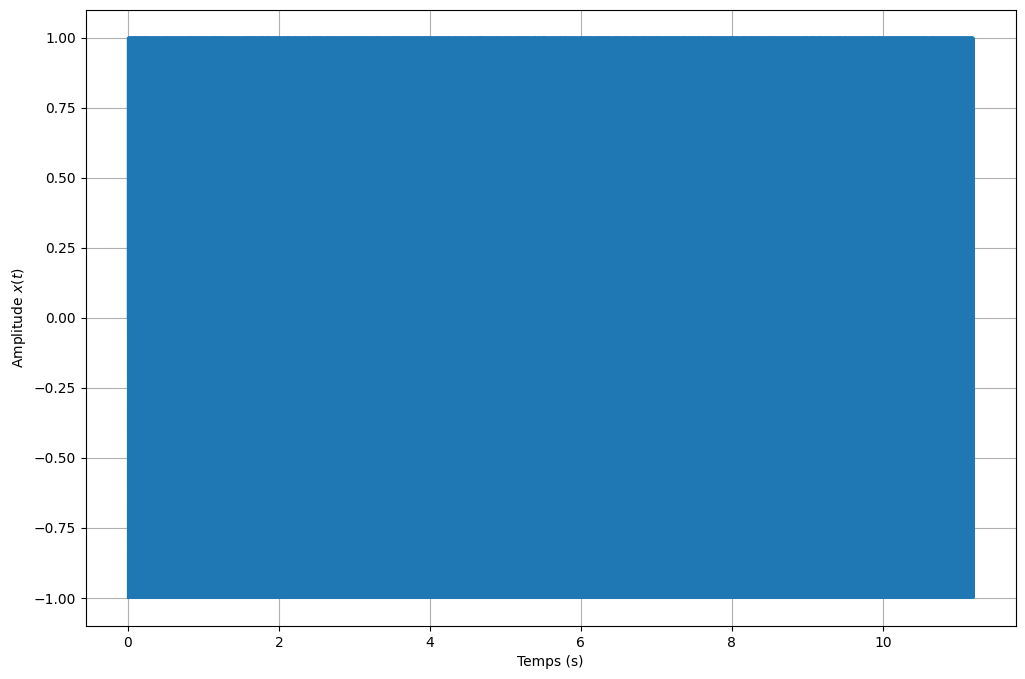

In [10]:
# Calcul de la durée de la modulation
Duree_modulation = len(data)/Fe 
print("La modulation a une durée de :", Duree_modulation, "secondes.")

# Génération du vecteur temps
t_modulation = np.arange(0, Duree_modulation, 1/Fe)
plt.figure(figsize = (12, 8))       # Créer une figure de taille 12cm x 8cm

# Tracer les données
plt.plot(t_modulation, data[:])

# Ajout de la grille et des noms des axes
plt.grid()
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude $x(t)$")
plt.show()

In [12]:
Fp = 21050                  # Nombre de bits initial (taille du message M)
baud = 30
Nbits = len(data)
Ns = int(Fe/baud) 
N = int(Nbits * Ns)

t = t_modulation                    # temps pour un symbole

Porteuse = np.sin(2*np.pi*Fp*t)     # Porteuse
Produit = data*Porteuse             # Multiplier le signal modulé par le signal de la porteuse

# Intégration dans le résultat Démod de période T = [0, Ns], Ns : taille du symbole envoyé par la méthode des Trapèzes
y = []                              # Résultat de l'intégration

for i in range(0, N, Ns):
    y.append(np.trapz(Produit[i:i+Ns], t[i:i+Ns]))

print(y)
print(len(y))

[0.016682138316499763, -0.016581179377228805, -0.01669782872669854, 0.01667234613085046, 0.01656956536127253, -0.016683401124694575, -0.016650587378894043, 0.016546072587432563, 0.016657029352818015, -0.016616894292184464, 0.01651071468687223, -0.016618711528349494, -0.016571289507668556, 0.016463531778146526, -0.016568471844418835, 0.01651380180412685, 0.01640453138935829, -0.016506353566203606, -0.01644447231635412, 0.016333782713813055, -0.016432404167238242, 0.016363345781759797, 0.016251303888739545, -0.016346656397364608, 0.01627050094643436, -0.016157195707678852, 0.016249211273347695, -0.016165979452275325, 0.016051483187232617, -0.016140111962441913, -0.016049865829872167, 0.015934255905315067, 0.016019431539632013, -0.015922251294343763, -0.015805628399841214, 0.015887272534858204, -0.015783205583524626, 0.015665653099178, 0.015743715991283196, -0.015632867667264867, -0.015514439389989455, 0.015588871421046438, -0.01547130245034511, 0.015352122253020267, 0.015422838890492785,

## III. Comparaison

In [13]:
# Si y > 0, le résultat est 1 (True) sinon ce sera -1 (False)
message_demodule = np.array(y) >= 0
print(len(message_demodule))
message_demodule_ASK = []

for ii in range(0, len(message_demodule)):

    if message_demodule [ii] == False:
        message_demodule_ASK.append(-1)

    if message_demodule [ii] == True:
        message_demodule_ASK.append(1)

print(message_demodule_ASK)

493920
[1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1

## IV. Décodage NRZ unipolaire

In [14]:
# Conversion binaire en string (char)
# On remet le message en suite de 0 et de 1

message_demodule = []

# Boucle for parcourant le message démodulé par pas de 2
for i in range(0, len(message_demodule_ASK)):

    if message_demodule_ASK [i] == 1:
        message_demodule.append(1)
    
    elif message_demodule_ASK [i] == -1:
        message_demodule.append(0)

print(len(message_demodule))
print(message_demodule)

493920
[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

## V. Trame

In [ ]:
# List = []
# for i in range (len(message_recu_bin)):
#     if i <= 31 :
#         List[i] = del message_recu_bin[i]
#     else :
#         List[i] = message_recu_bin[i]

## VI. Binaire vers ASCII

In [16]:
# Ecrire la suite binaire du message dans une chaine de charactères
# Nous avons créé une liste bytes_lst récupérant les octets
# pour un octet (byte) du message démodulé, le code ira le retrouver
# dans la table ASCII pour le transformer en charactères 
# data_reçu servira à assembler tous les charactères retrouvés

print(message_demodule)
bytes_lst = []

for byte in [message_demodule[i:i+8] for i in range(0, len(message_demodule), 8)]:
    bytes_lst.append(''.join([str(elem) for elem in byte]))
data_reçu = ''.join([chr(int(byte, 2)) for byte in bytes_lst])

# Affichage du résultat
print("Le message reçu est :", data_reçu)

[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 